Reading CSV file: /Users/racheledominguez/OneDrive - Randolph-Macon College/03-RMC_Research/CoastalSeds23/New Paper Manuscript/eSURF_Pub_Figs/Annual_SEPI_Results/01-PortlandAnnual SEPI.csv
01-Portland-missing.csv
01-PortlandAnnual SEPI.csv
Index(['Year', ' Number of Storms', ' Total SEPI '], dtype='object')
Number of Years to Skip =  12
Reading CSV file: /Users/racheledominguez/OneDrive - Randolph-Macon College/03-RMC_Research/CoastalSeds23/New Paper Manuscript/eSURF_Pub_Figs/Annual_SEPI_Results/02-BostonAnnual SEPI.csv
02-Boston-missing.csv
02-BostonAnnual SEPI.csv
Index(['Year', ' Number of Storms', ' Total SEPI '], dtype='object')
Number of Years to Skip =  3
Reading CSV file: /Users/racheledominguez/OneDrive - Randolph-Macon College/03-RMC_Research/CoastalSeds23/New Paper Manuscript/eSURF_Pub_Figs/Annual_SEPI_Results/03-NewportAnnual SEPI.csv
03-Newport-missing.csv
03-NewportAnnual SEPI.csv
Index(['Year', ' Number of Storms', ' Total SEPI '], dtype='object')
Number of Years to Skip

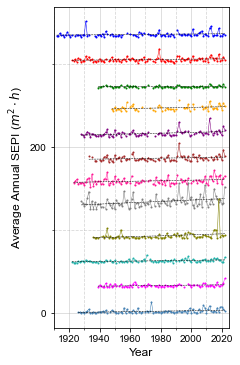

In [3]:

import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import parser
import shutil
import numpy as np
from scipy.stats import linregress
import csv


plt.rcParams["font.family"] = "Arial"

# Convert millimeters to inches
mm_to_inch = 0.0393701
fig_width_mm = 80
#fig_width_mm = 200
fig_height_mm = 150

fig_width_inch = fig_width_mm * mm_to_inch
fig_height_inch = fig_height_mm * mm_to_inch

# Create the figure with the specified size in millimeters
plt.figure(figsize=(fig_width_inch, fig_height_inch))

# Set the path to the directory containing the CSV file
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
dir_path = os.path.join(parent_dir, 'Annual_SEPI_Results')
missing_dir_path = os.path.join(parent_dir, 'Results_Missing_Data')

# Get a list of all CSV files in the directory
file_names = [f for f in os.listdir(dir_path) if f.endswith('.csv')]
missing_file_names = [f for f in os.listdir(missing_dir_path) if f.endswith('.csv')]


# ------------------------------------------------------------------------------------
output_path = "plot.jpeg"
output_csv_path = "ave_ann_sepi_params.csv"
# ------------------------------------------------------------------------------------

# Create the output data file to write fit params:
# Open the CSV file for writing and create the header row
with open(output_csv_path, 'w', newline='') as csvfile:
    # Create a CSV writer
    csvwriter = csv.writer(csvfile)
    # Write the header row
    csvwriter.writerow(['Station', 'Slope', "p value", "R squared value", "St error", "Intercept"])


# Loop through each CSV file and create a plot
#plt.figure(figsize=(8, 12))
#plt.figure(figsize=(20, 12))

# Set the vertical offset
vertical_offset = 330

colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'deeppink', 'gray', 'olive', 'lightseagreen', 'magenta', 'steelblue']
file_names = sorted(file_names)
missing_file_names = sorted(missing_file_names) 

#label_list = ["Portland", "Boston", "Newport", "Montauk", "The Battery", "Sandy Hook", "Atlantic City", "Sewell's Point", "Willmington", "Charleston", "Fernandina Beach", "Key West"]
label_list = ["Portland", "Boston", "Newport", "Montauk", "The Battery", "Sandy H.", "Atlantic C.", "Sewell's P.", "Willmington", "Charleston", "Fernand. B.", "Key West"]



for i, file_name in enumerate(file_names):
    print("Reading CSV file:", os.path.join(dir_path, file_name))
    print(missing_file_names[i])
    print(file_name)
    m_file_name = missing_file_names[i]
    
    # Load the CSV file into a pandas dataframe
    df = pd.read_csv(os.path.join(dir_path, file_name))
    print(df.columns)
    mdf = pd.read_csv(os.path.join(missing_dir_path, m_file_name))

    # Clean the column names
    df.columns = df.columns.str.strip()
    mdf.columns = mdf.columns.str.strip()

    total_num_points = 8760
    thr = 0.1 * 8760        # Only keep if 90% of the data is present
    mdf["Threshold"] = mdf["# of Missing points"].apply(lambda x: True if x < thr else False)

    # Create a new column in the dataframe to mark missing data as NaN
    df.loc[df['Year'].isin(mdf[mdf['Threshold'] == False]['Year']), 'Total SEPI'] = np.nan

    # Create a plot with the modified data
    plt.plot(df['Year'], df['Total SEPI']/df['Number of Storms'] + vertical_offset, color=colors[i % len(colors)], marker='o', markersize=1.0, linewidth = 0.5, label=label_list[i], linestyle="-")

        
    # Print labels next to the data points
    x_label = 2030
    y_label = vertical_offset + 12
    #plt.text(x_label, y_label, label_list[i], color=colors[i % len(colors)], fontsize=8)    
        
    # Linear fit analysis
    # Create an empty list to store the years that satisfy the condition
    years_to_skip = []

    # Iterate through the DataFrame and check the condition
    for index, row in mdf.iterrows():
        if row['Threshold'] is False:
            years_to_skip.append(row['Year'])
            
    print("Number of Years to Skip = ", len(years_to_skip))
    df_filtered = df[~df['Year'].isin(years_to_skip)]
    
    # Add linear trendline and equation
    x = df_filtered['Year']
    y = df_filtered['Total SEPI']/df_filtered['Number of Storms'] 
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    
        
    # Calculate linear regression and p-value using scipy.stats.linregress
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    r2_value = r_value * r_value

    # Print equation and p-value
    #print("Trendline: y = {:.2f}x + {:.2f}".format(slope, intercept))
    #print("P-value for slope coefficient:", p_value)
    # Open the CSV file for appending data
    with open(output_csv_path, 'a', newline='') as csvfile:
        # Create a CSV writer
        csvwriter = csv.writer(csvfile)
        #csvwriter.writerow([label_list[i], slope, p_value, r2_value, std_err, intercept])
        csvwriter.writerow([label_list[i], 
                   "{:.8f}".format(slope), 
                   "{:.8f}".format(p_value), 
                   "{:.8f}".format(r2_value), 
                   "{:.8f}".format(std_err), 
                   "{:.8f}".format(intercept)])

    # Plot trendlines
    #label_text = "m = {:.4f}, p = {:.4f}, $R^2$ = {:.4f}, st err = {:.4f}".format(slope, p_value, r2_value, std_err)
    #print("y={:.2f}x+{:.2f}".format(z[0], z[1]))
    plt.plot(x, p(x)+ vertical_offset, "k--", linewidth=.5)
    # Print labels next to the data points
    x_label = 2070
    y_label = vertical_offset + 12
    # Add params to plot
    #plt.text(x_label, y_label, label_text, color=colors[i % len(colors)], fontsize=8)
    
    #plt.plot(x, p(x)+ vertical_offset, "k--", linewidth=2)
    #plt.text(1920, 35, "y={:.2f}x+{:.2f}".format(z[0], z[1]), fontsize=25)
    #print("y={:.2f}x+{:.2f}".format(z[0], z[1]))

    vertical_offset -= 30

    
plt.xlim(1910,2025)    
    
# Customize the gridlines and labels
plt.grid(True, which='major', axis='x', alpha=0.5, linestyle='-')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(20))
plt.grid(True, which='minor', axis='x', alpha=0.5, linestyle='--')
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(True, which='minor', axis='y', alpha=0.5, linestyle='--')
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(100))
plt.grid(True, which='major', axis='y', alpha=0.5, linestyle='-')
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(200))



plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Annual SEPI ($m^2 \cdot h$)", fontsize=12)
plt.tick_params(axis='both', labelsize=10)
plt.savefig(output_path, dpi=1000, bbox_inches='tight')
plt.show()
plt.close()
